### Data are downloaded from:
http://jmcauley.ucsd.edu/data/amazon/

Notes:
    * There are two types of datasets:
        * Raw reviews datasets with only (user,item,rating,timestamp) tuples
        * 5-core datasets: which have been reduced such that each of the remaining users and items have 5 reviews each
    * Start with the small data set first. Here, the smallest set is Musical Instruments with ~ 10k reviews.

In [2]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('F:\\data\\reviews_Musical_Instruments_5.json.gz')

In [3]:
df.head(5)

,helpful,reviewerID,overall,unixReviewTime,reviewTime,reviewerName,asin,summary,reviewText
0,"[0, 0]",A2IBPI20UZIR0U,5.0,1393545600,"02 28, 2014","cassandra tu ""Yeah, well, that's just like, u...",1384719342,good,"Not much to write about here, but it does exac..."
1,"[13, 14]",A14VAT5EAX3D9S,5.0,1363392000,"03 16, 2013",Jake,1384719342,Jake,The product does exactly as it should and is q...
2,"[1, 1]",A195EZSQDW3E21,5.0,1377648000,"08 28, 2013","Rick Bennette ""Rick Bennette""",1384719342,It Does The Job Well,The primary job of this device is to block the...
3,"[0, 0]",A2C00NNG1ZQQG2,5.0,1392336000,"02 14, 2014","RustyBill ""Sunday Rocker""",1384719342,GOOD WINDSCREEN FOR THE MONEY,Nice windscreen protects my MXL mic and preven...
4,"[0, 0]",A94QU4C90B1AX,5.0,1392940800,"02 21, 2014",SEAN MASLANKA,1384719342,No more pops when I record my vocals.,This pop filter is great. It looks and perform...


In [3]:
type(df['helpful'][5:10])

pandas.core.series.Series

In [5]:
print(df['helpful'][1])

[13, 14]


In [4]:
type(df['helpful'][1])

list

In [7]:
from datetime import datetime
datetime.fromtimestamp(1393545600)

datetime.datetime(2014, 2, 27, 18, 0)

In [8]:
datetime.fromtimestamp(1363392000)

datetime.datetime(2013, 3, 15, 18, 0)

In [9]:
df.shape

(10261, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 9 columns):
helpful           10261 non-null object
unixReviewTime    10261 non-null int64
summary           10261 non-null object
reviewText        10261 non-null object
reviewTime        10261 non-null object
asin              10261 non-null object
overall           10261 non-null float64
reviewerName      10234 non-null object
reviewerID        10261 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 801.6+ KB


* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 0000013714
* reviewerName - name of the reviewer
* helpful - helpfulness rating of the review, e.g. 2/3
* reviewText - text of the review
* overall - rating of the product
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* reviewTime - time of the review (raw)

### Questions:
    1. 

### How many products in this dataset?

In [11]:
df['asin'].nunique()

900

In [19]:
df['asin'].count()

10261

In [25]:
df[['asin']].head(10)

,asin
0,1384719342
1,1384719342
2,1384719342
3,1384719342
4,1384719342
5,B00004Y2UT
6,B00004Y2UT
7,B00004Y2UT
8,B00004Y2UT
9,B00004Y2UT


In [4]:
df1 = df
df1.head()

,helpful,reviewerID,overall,unixReviewTime,reviewTime,reviewerName,asin,summary,reviewText
0,"[0, 0]",A2IBPI20UZIR0U,5.0,1393545600,"02 28, 2014","cassandra tu ""Yeah, well, that's just like, u...",1384719342,good,"Not much to write about here, but it does exac..."
1,"[13, 14]",A14VAT5EAX3D9S,5.0,1363392000,"03 16, 2013",Jake,1384719342,Jake,The product does exactly as it should and is q...
2,"[1, 1]",A195EZSQDW3E21,5.0,1377648000,"08 28, 2013","Rick Bennette ""Rick Bennette""",1384719342,It Does The Job Well,The primary job of this device is to block the...
3,"[0, 0]",A2C00NNG1ZQQG2,5.0,1392336000,"02 14, 2014","RustyBill ""Sunday Rocker""",1384719342,GOOD WINDSCREEN FOR THE MONEY,Nice windscreen protects my MXL mic and preven...
4,"[0, 0]",A94QU4C90B1AX,5.0,1392940800,"02 21, 2014",SEAN MASLANKA,1384719342,No more pops when I record my vocals.,This pop filter is great. It looks and perform...


In [5]:
sorted(df1.groupby(['asin']).size(),reverse=True)

[163,
 143,
 116,
 114,
 93,
 74,
 71,
 69,
 68,
 67,
 65,
 63,
 62,
 58,
 58,
 57,
 57,
 55,
 55,
 52,
 49,
 47,
 46,
 46,
 46,
 45,
 44,
 44,
 42,
 41,
 37,
 37,
 35,
 35,
 34,
 33,
 33,
 33,
 32,
 32,
 32,
 31,
 30,
 29,
 29,
 29,
 28,
 28,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 

In [34]:
#num_reviews = sorted(df1.groupby(['asin']).size(),reverse=True)
num_reviews = df1.groupby(['asin']).size()
print(type(num_reviews))
num_reviews.head()

<class 'pandas.core.series.Series'>


asin
1384719342    5
B00004Y2UT    6
B00005ML71    5
B000068NSX    7
B000068NTU    5
dtype: int64

In [29]:
num_reviews.idxmax()

'B003VWJ2K8'

In [48]:
top5 = num_reviews.nlargest(5)
print(top5)

asin
B003VWJ2K8    163
B0002E1G5C    143
B0002F7K7Y    116
B003VWKPHC    114
B0002H0A3S     93
dtype: int64


In [51]:
list(top5.index)

['B003VWJ2K8', 'B0002E1G5C', 'B0002F7K7Y', 'B003VWKPHC', 'B0002H0A3S']

In [46]:
num_reviews.sorted()

AttributeError: 'Series' object has no attribute 'sorted'

In [18]:
num_reviews_df = pd.DataFrame(num_reviews,columns=['review counts'])
num_reviews_df.head()

,review counts
asin,
1384719342,5
B00004Y2UT,6
B00005ML71,5
B000068NSX,7
B000068NTU,5


In [6]:
def top_n_rows(df,col,n):
    '''
    group the df by col and then return a list of
    the top n rows
    '''
    groupBy_col = df.groupby(col).size() #a pd.Series of counts
    
    top_n = groupBy_col.nlargest(n) #select top n counts
    #another method:
    #top_n = groupBy_col.sort_values(ascending=False)[:n] #select top n counts
    
    return list(top_n.index) #convert to list

#The above function can be relaced by the built-in:
#list(df.col.value_counts()[:n].index)

In [7]:
top_n_rows(df,'asin',5)

['B003VWJ2K8', 'B0002E1G5C', 'B0002F7K7Y', 'B003VWKPHC', 'B0002H0A3S']

In [8]:
#type(df.loc[df['asin'] == 'B003VWJ2K8'])# type(df.loc[df['asin'] == 'B003VWJ2K8'])
top1 = df.loc[df['asin'] == 'B003VWJ2K8'] #a dataframe
top1.head()

,helpful,reviewerID,overall,unixReviewTime,reviewTime,reviewerName,asin,summary,reviewText
8107,"[0, 0]",A3MONHA5DCPPLZ,3.0,1390003200,"01 18, 2014",3rdtimer,B003VWJ2K8,Eats batteries.,It works but shut it down as soon as you are f...
8108,"[0, 0]",ASYHYW0USZVN6,5.0,1357948800,"01 12, 2013",aashish,B003VWJ2K8,awesome item,very awesome item. really useful for tuning. h...
8109,"[1, 1]",A1RSRUQVKB5EBO,5.0,1322438400,"11 28, 2011",A F&amp;T,B003VWJ2K8,nice tuner for the $,My friend has commented on its bright color - ...
8110,"[0, 0]",A22Z554ZQ8NFPC,5.0,1299196800,"03 4, 2011","AF ""Whigs""",B003VWJ2K8,Wow! Great tuner!,I have another cheap clip on tuner from guitar...
8111,"[0, 0]",A2SBZZ1HSR7WSP,5.0,1324166400,"12 18, 2011",A. Mayse,B003VWJ2K8,excellent tuner,the snark series of tuners are the best small ...


In [9]:
top1['unixReviewTime'].values

array([1390003200, 1357948800, 1322438400, 1299196800, 1324166400,
       1396224000, 1295222400, 1384646400, 1355356800, 1353196800,
       1380931200, 1360540800, 1376265600, 1402617600, 1324944000,
       1402444800, 1377475200, 1379289600, 1376179200, 1404604800,
       1323043200, 1402876800, 1381449600, 1311120000, 1372291200,
       1361232000, 1315958400, 1396915200, 1305936000, 1397606400,
       1362268800, 1389571200, 1404000000, 1381968000, 1388793600,
       1389830400, 1369785600, 1349308800, 1377388800, 1294617600,
       1383091200, 1339372800, 1363910400, 1397001600, 1355443200,
       1322956800, 1359072000, 1403568000, 1334880000, 1392940800,
       1397088000, 1386720000, 1377388800, 1354924800, 1394841600,
       1375920000, 1383436800, 1327968000, 1346025600, 1386547200,
       1368489600, 1396828800, 1357344000, 1331769600, 1340323200,
       1362009600, 1402617600, 1394409600, 1289347200, 1365206400,
       1309046400, 1370563200, 1384041600, 1345161600, 1322006

In [10]:
from datetime import datetime
print(datetime.fromtimestamp(1390003200))
print(datetime.fromtimestamp(1357948800))

2014-01-17 18:00:00
2013-01-11 18:00:00


In [11]:
for review_time in top1['unixReviewTime'].values:
    print(datetime.fromtimestamp(review_time))

2014-01-17 18:00:00
2013-01-11 18:00:00
2011-11-27 18:00:00
2011-03-03 18:00:00
2011-12-17 18:00:00
2014-03-30 18:00:00
2011-01-16 18:00:00
2013-11-16 18:00:00
2012-12-12 18:00:00
2012-11-17 18:00:00
2013-10-04 18:00:00
2013-02-10 18:00:00
2013-08-11 18:00:00
2014-06-12 18:00:00
2011-12-26 18:00:00
2014-06-10 18:00:00
2013-08-25 18:00:00
2013-09-15 18:00:00
2013-08-10 18:00:00
2014-07-05 18:00:00
2011-12-04 18:00:00
2014-06-15 18:00:00
2013-10-10 18:00:00
2011-07-19 18:00:00
2013-06-26 18:00:00
2013-02-18 18:00:00
2011-09-13 18:00:00
2014-04-07 18:00:00
2011-05-20 18:00:00
2014-04-15 18:00:00
2013-03-02 18:00:00
2014-01-12 18:00:00
2014-06-28 18:00:00
2013-10-16 18:00:00
2014-01-03 18:00:00
2014-01-15 18:00:00
2013-05-28 18:00:00
2012-10-03 18:00:00
2013-08-24 18:00:00
2011-01-09 18:00:00
2013-10-29 18:00:00
2012-06-10 18:00:00
2013-03-21 18:00:00
2014-04-08 18:00:00
2012-12-13 18:00:00
2011-12-03 18:00:00
2013-01-24 18:00:00
2014-06-23 18:00:00
2012-04-19 18:00:00
2014-02-20 18:00:00


In [ ]:
df.groupby('asin').size().sort_values(ascending=False)[:5]
list(df.asin.value_counts()[:5].index)
list(df.asin.value_counts()[df.asin.value_counts() >100].index)

In [27]:
df1['count'] = 1
df1.head()

,helpful,unixReviewTime,summary,reviewText,reviewTime,asin,overall,reviewerName,reviewerID,count
0,"[0, 0]",1393545600,good,"Not much to write about here, but it does exac...","02 28, 2014",1384719342,5.0,"cassandra tu ""Yeah, well, that's just like, u...",A2IBPI20UZIR0U,1
1,"[13, 14]",1363392000,Jake,The product does exactly as it should and is q...,"03 16, 2013",1384719342,5.0,Jake,A14VAT5EAX3D9S,1
2,"[1, 1]",1377648000,It Does The Job Well,The primary job of this device is to block the...,"08 28, 2013",1384719342,5.0,"Rick Bennette ""Rick Bennette""",A195EZSQDW3E21,1
3,"[0, 0]",1392336000,GOOD WINDSCREEN FOR THE MONEY,Nice windscreen protects my MXL mic and preven...,"02 14, 2014",1384719342,5.0,"RustyBill ""Sunday Rocker""",A2C00NNG1ZQQG2,1
4,"[0, 0]",1392940800,No more pops when I record my vocals.,This pop filter is great. It looks and perform...,"02 21, 2014",1384719342,5.0,SEAN MASLANKA,A94QU4C90B1AX,1


In [34]:
df2 = df1[['asin','count']].dropna().groupby(['asin'])
df2.head()

,asin,count
0,1384719342,1
1,1384719342,1
2,1384719342,1
3,1384719342,1
4,1384719342,1
5,B00004Y2UT,1
6,B00004Y2UT,1
7,B00004Y2UT,1
8,B00004Y2UT,1
9,B00004Y2UT,1


In [37]:
df2.count().head()

,count
asin,
1384719342,5
B00004Y2UT,6
B00005ML71,5
B000068NSX,7
B000068NTU,5


In [38]:
df2.sum().head()

,count
asin,
1384719342,5
B00004Y2UT,6
B00005ML71,5
B000068NSX,7
B000068NTU,5


In [28]:
df2 = df1[['asin','count']].dropna().groupby(['asin']).count()
df2.head(10)

,count
asin,
1384719342,5
B00004Y2UT,6
B00005ML71,5
B000068NSX,7
B000068NTU,5
B000068NVI,13
B000068NW5,52
B000068NZC,7
B000068NZG,5


In [13]:
df2 = df[['asin','overall']].dropna().groupby(['asin']).mean()
df2.head(10)

,overall
asin,
1384719342,5.000000
B00004Y2UT,4.666667
B00005ML71,3.800000
B000068NSX,4.571429
B000068NTU,4.800000
B000068NVI,4.538462
B000068NW5,4.461538
B000068NZC,4.142857
B000068NZG,4.600000


In [14]:
df2.shape

(900, 1)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

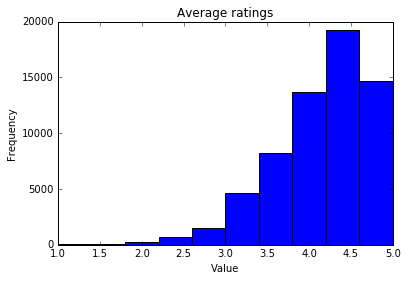

In [18]:
plt.hist(df2['overall'])
plt.title("Average ratings")
plt.xlabel("Value")
plt.ylabel("Frequency")

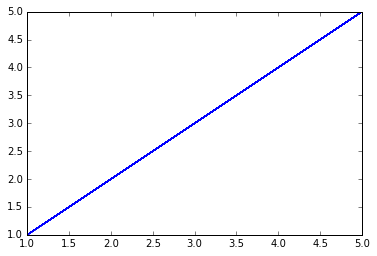

In [52]:
plt.plot(df2['overall'],df2['overall'])

### Which product has the most number of reviews?

In [23]:
df3 = df[['asin','overall']].dropna().groupby(['asin']).size() 
#df3 is just a pandas series
df3.head()

asin
0528881469      5
0594451647      5
0594481813      8
0972683275    219
1400501466     43
dtype: int64

In [24]:
df3.max()

4915

In [30]:
#to have df3 as a dataframe instead:
df3 = pd.DataFrame(df[['asin','overall']].dropna().groupby(['asin']).size().rename(('counts')))
df3.head()

,counts
asin,
0528881469,5
0594451647,5
0594481813,8
0972683275,219
1400501466,43


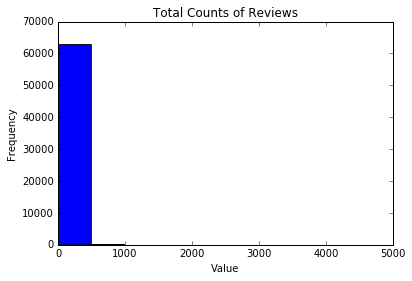

In [33]:
plt.hist(df3['counts'])
plt.title("Total Counts of Reviews")
plt.xlabel("Value")
plt.ylabel("Frequency")

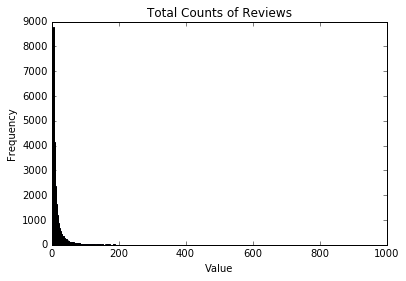

In [35]:
plt.hist(df3['counts'], bins=range(0, 1000))
plt.title("Total Counts of Reviews")
plt.xlabel("Value")
plt.ylabel("Frequency")

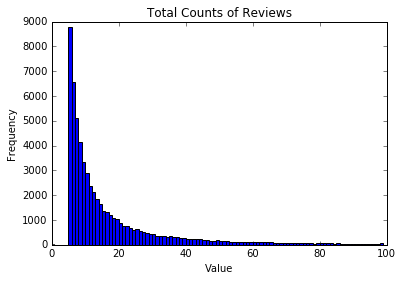

In [36]:
plt.hist(df3['counts'], bins=range(0, 100))
plt.title("Total Counts of Reviews")
plt.xlabel("Value")
plt.ylabel("Frequency")

** So one interesting observation is that products with high average ratings constitute the major counts of all reviews. However, the major counts of the reviews belong to products with low number of reviews.

In [39]:
df4 = df3[df3['counts']>=20]
df4.head()

,counts
asin,
0972683275,219
1400501466,43
1400501520,20
1400501776,20
1400532620,41


In [40]:
df4.shape

(18156, 1)

a df with each product in a row, where columns are reviews sorted by date.

### Q: Find the most useful review of each product. What are their ratings?

In [49]:
df.head()

,reviewerName,overall,reviewTime,helpful,unixReviewTime,summary,reviewText,reviewerID,asin
0,amazdnu,5.0,"06 2, 2013","[0, 0]",1370131200,Gotta have GPS!,We got this GPS for my husband who is an (OTR)...,AO94DHGC771SJ,0528881469
1,Amazon Customer,1.0,"11 25, 2010","[12, 15]",1290643200,Very Disappointed,"I'm a professional OTR truck driver, and I bou...",AMO214LNFCEI4,0528881469
2,C. A. Freeman,3.0,"09 9, 2010","[43, 45]",1283990400,1st impression,"Well, what can I say. I've had this unit in m...",A3N7T0DY83Y4IG,0528881469
3,"Dave M. Shaw ""mack dave""",2.0,"11 24, 2010","[9, 10]",1290556800,"Great grafics, POOR GPS","Not going to write a long review, even thought...",A1H8PY3QHMQQA0,0528881469
4,Wayne Smith,1.0,"09 29, 2011","[0, 0]",1317254400,"Major issues, only excuses for support",I've had mine for a year and here's what we go...,A24EV6RXELQZ63,0528881469


In [57]:
#plt.plot(df['overall'],df['overall'])
def helpful_yes(helpful):
    yes = helpful[0]
    return yes

In [66]:
helpful_yes(df['helpful'][0])

0

In [70]:
df['helpful_yes'] = df['helpful'].apply(lambda x: int(x[0]))

In [71]:
df.head()

,reviewerName,overall,reviewTime,helpful,unixReviewTime,summary,reviewText,reviewerID,asin,helpful_yes
0,amazdnu,5.0,"06 2, 2013","[0, 0]",1370131200,Gotta have GPS!,We got this GPS for my husband who is an (OTR)...,AO94DHGC771SJ,0528881469,0
1,Amazon Customer,1.0,"11 25, 2010","[12, 15]",1290643200,Very Disappointed,"I'm a professional OTR truck driver, and I bou...",AMO214LNFCEI4,0528881469,12
2,C. A. Freeman,3.0,"09 9, 2010","[43, 45]",1283990400,1st impression,"Well, what can I say. I've had this unit in m...",A3N7T0DY83Y4IG,0528881469,43
3,"Dave M. Shaw ""mack dave""",2.0,"11 24, 2010","[9, 10]",1290556800,"Great grafics, POOR GPS","Not going to write a long review, even thought...",A1H8PY3QHMQQA0,0528881469,9
4,Wayne Smith,1.0,"09 29, 2011","[0, 0]",1317254400,"Major issues, only excuses for support",I've had mine for a year and here's what we go...,A24EV6RXELQZ63,0528881469,0


In [89]:
df['reviewText'][0]

'We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!'

In [73]:
df['helpful_yes'].max()

30735

In [75]:
df5 = pd.DataFrame(df[['asin','helpful_yes']].dropna().groupby(['asin']).sum())

In [76]:
df5.head()

,helpful_yes
asin,
0528881469,64
0594451647,6
0594481813,10
0972683275,207
1400501466,186


In [77]:
df5['helpful_yes'].max()

54042

In [78]:
df2.head()

,overall
asin,
0528881469,2.400000
0594451647,4.200000
0594481813,4.000000
0972683275,4.461187
1400501466,3.953488


In [82]:
df5.shape

(63001, 1)

In [83]:
#df6 = pd.merge(df2, df5, on='NPI', how='inner')
df5 = pd.merge(df2,df5, left_index = True, right_index=True)

In [84]:
df5.head()

,overall,helpful_yes
asin,,
0528881469,2.400000,64
0594451647,4.200000,6
0594481813,4.000000,10
0972683275,4.461187,207
1400501466,3.953488,186


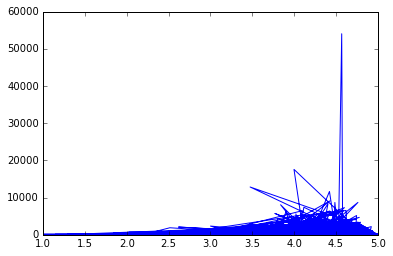

In [86]:
plt.plot(df5['overall'],df5['helpful_yes'])

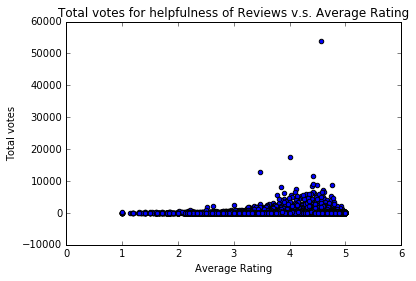

In [90]:
plt.scatter(df5['overall'],df5['helpful_yes'])
plt.title("Total votes for helpfulness of Reviews v.s. Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Total votes")